<a href="https://colab.research.google.com/github/Manipal03/POLYP-DETECTION-WL/blob/main/Training_Polyp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Polyp Detection Training*

In [1]:
!nvidia-smi

Tue Jun 17 06:50:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
from ultralytics import YOLO
from os import path
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks



Ultralytics 8.3.153  Python-3.12.7 torch-2.7.1+cpu CPU (12th Gen Intel Core(TM) i5-12450H)
Setup complete  (12 CPUs, 15.7 GB RAM, 114.3/476.1 GB disk)

OS                  Windows-11-10.0.26100-SP0
Environment         Windows
Python              3.12.7
Install             pip
Path                C:\Users\HP\anaconda3\Lib\site-packages\ultralytics
RAM                 15.67 GB
Disk                114.3/476.1 GB
CPU                 12th Gen Intel Core(TM) i5-12450H
CPU count           12
GPU                 None
GPU count           None
CUDA                None

numpy                1.26.4>=1.23.0
matplotlib           3.9.2>=3.3.0
opencv-python        4.11.0.86>=4.6.0
pillow               10.4.0>=7.1.2
pyyaml               6.0.1>=5.3.1
requests             2.32.3>=2.23.0
scipy                1.13.1>=1.4.1
torch                2.7.1>=1.8.0
torch                2.7.1!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision          0.22.1>=0.9.0
tqdm                 4.66.5>=4.64.0
psutil      

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="namkdmAFeMCqXzqapE3E")
project = rf.workspace("manipal-sabhavat-wjd1w").project("polyp-detection-xdae2")
version = project.version(1)
dataset = version.download("yolov12")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 131.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Polyp-Detection-1 in yolov12:: 100%|██████████| 3784/3784 [00:00<00:00, 7611.44it/s]


In [4]:
!yolo train model=yolo12n.pt data=/content/Polyp-Detection-1/data.yaml epochs=75 imgsz=640 plots=True


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 5.34M/5.34M [00:00<00:00, 84.1MB/s]
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Polyp-Detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=75, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz

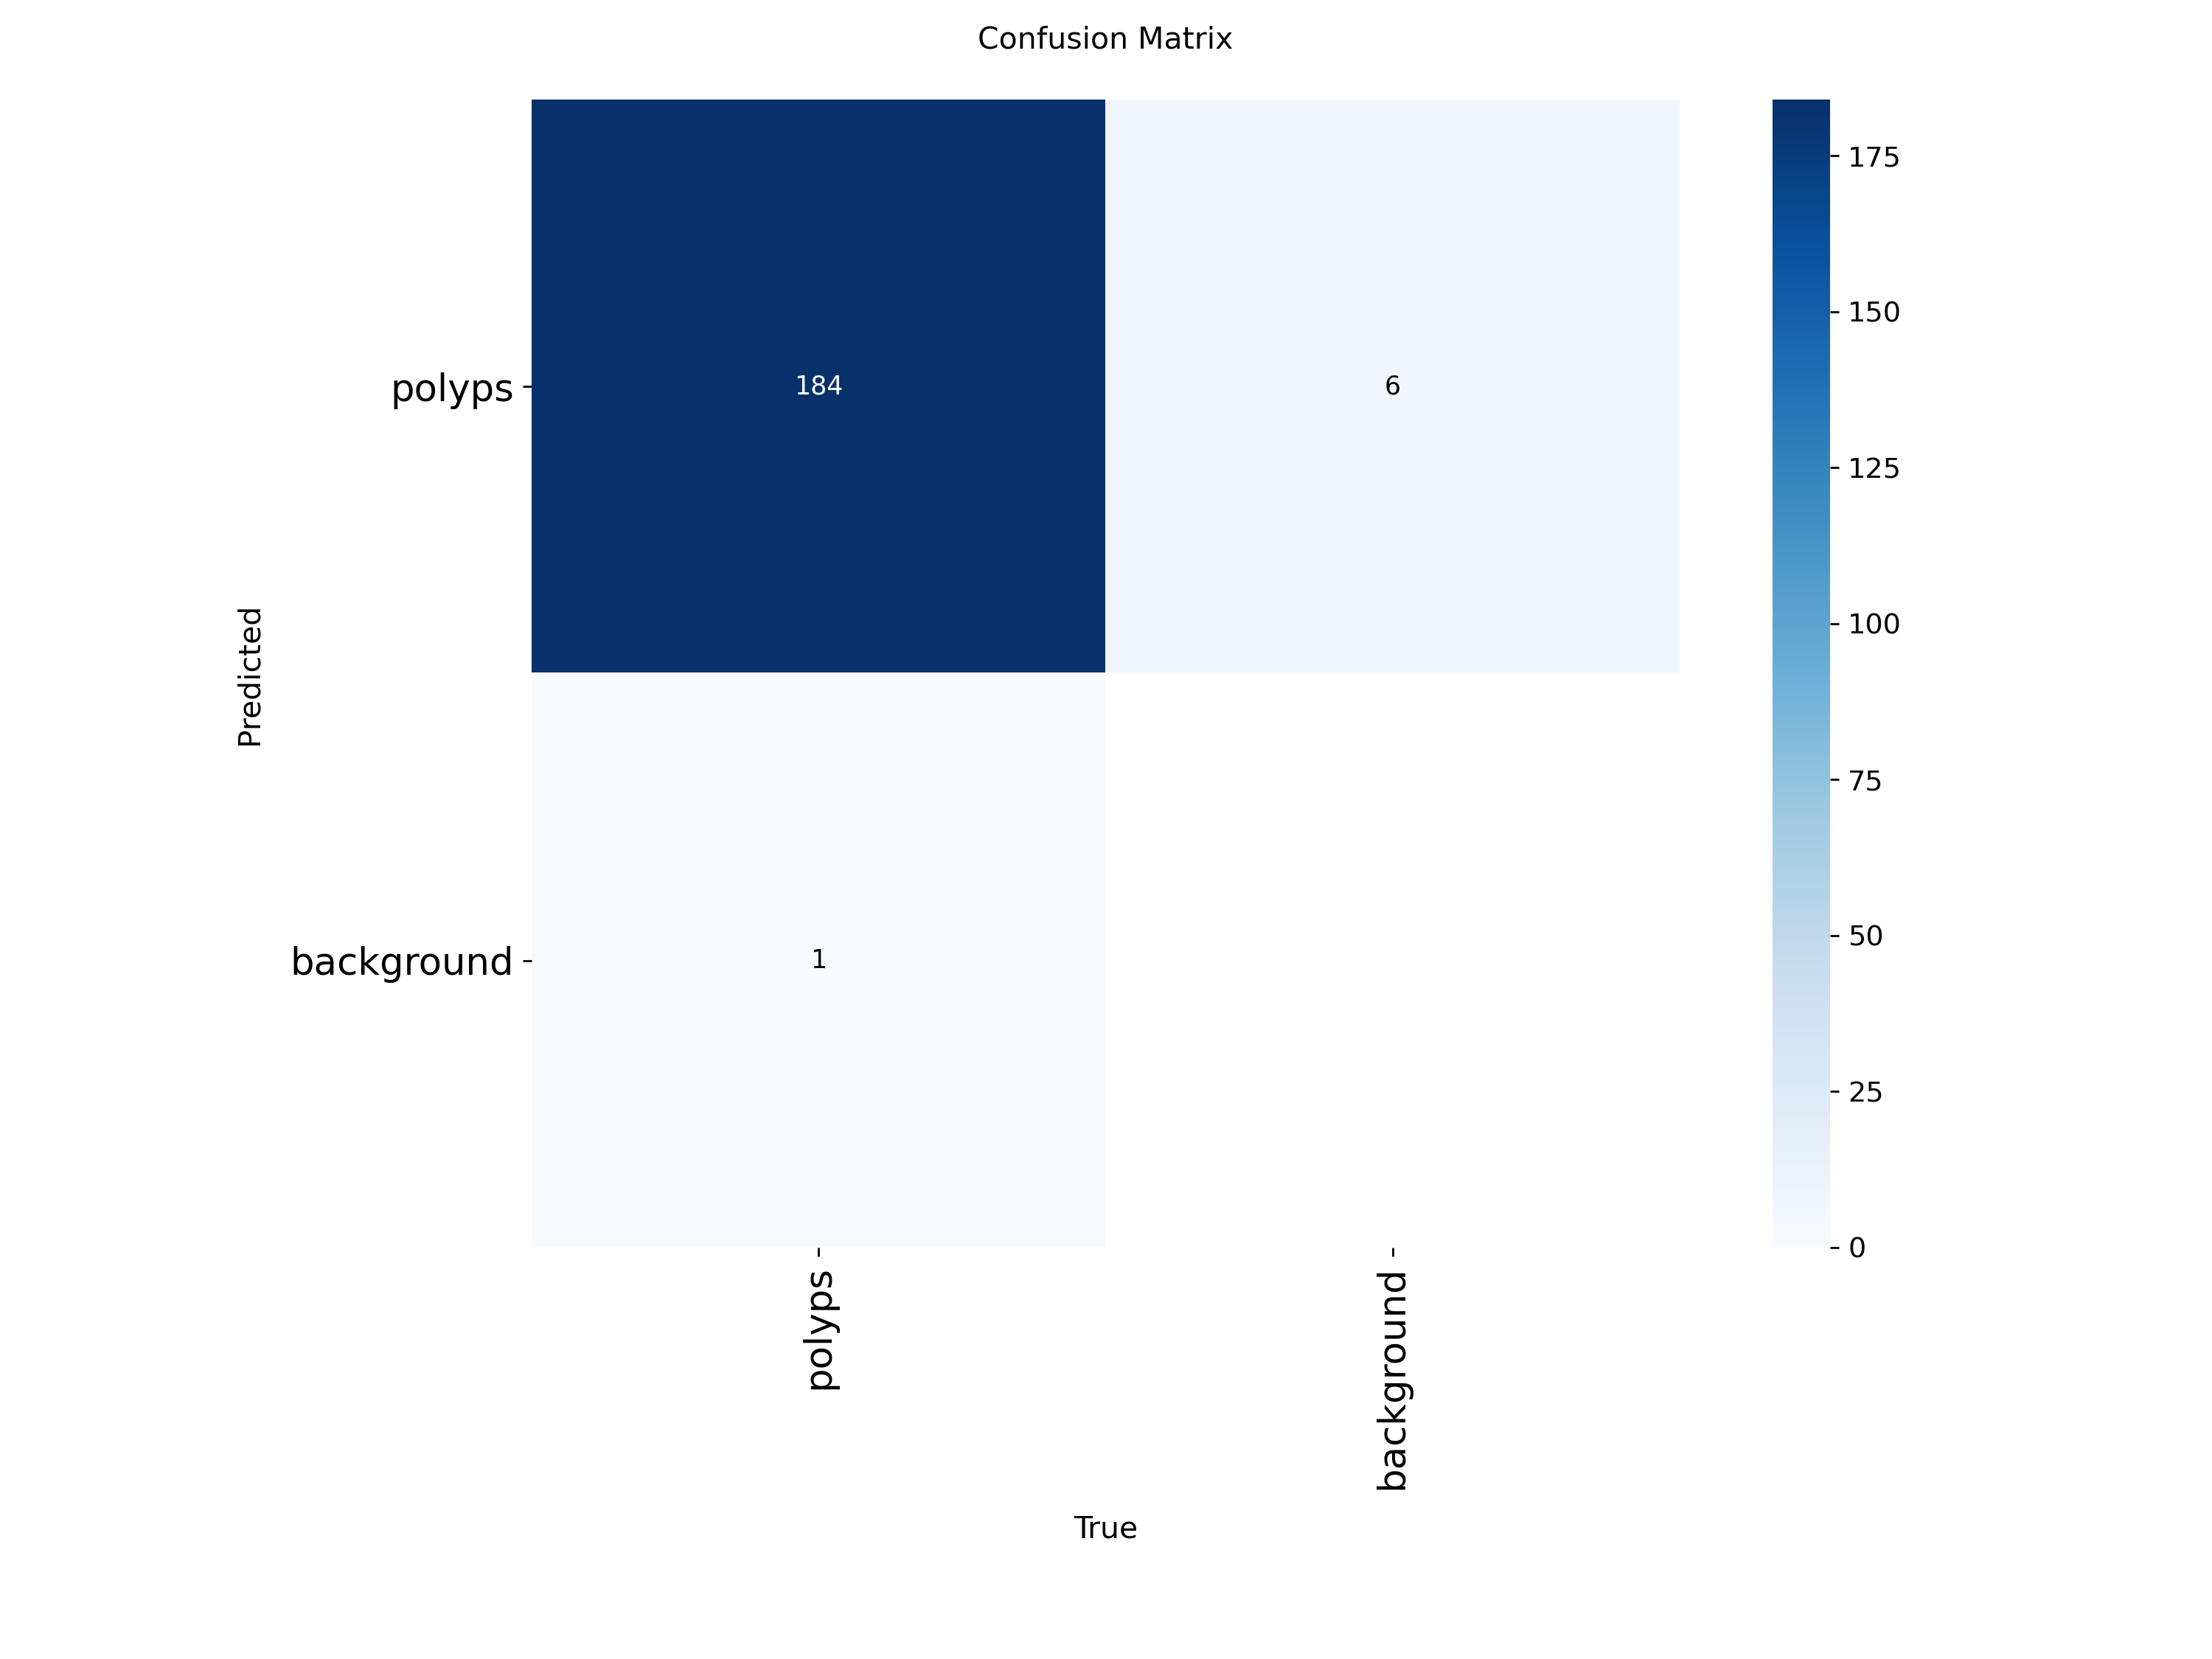

In [8]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

In [7]:
from ultralytics import YOLO
from os import path
from IPython.display import display, Image # Import both display and Image here
from IPython import get_ipython # Keep this if needed elsewhere, but it's not strictly required for displaying images


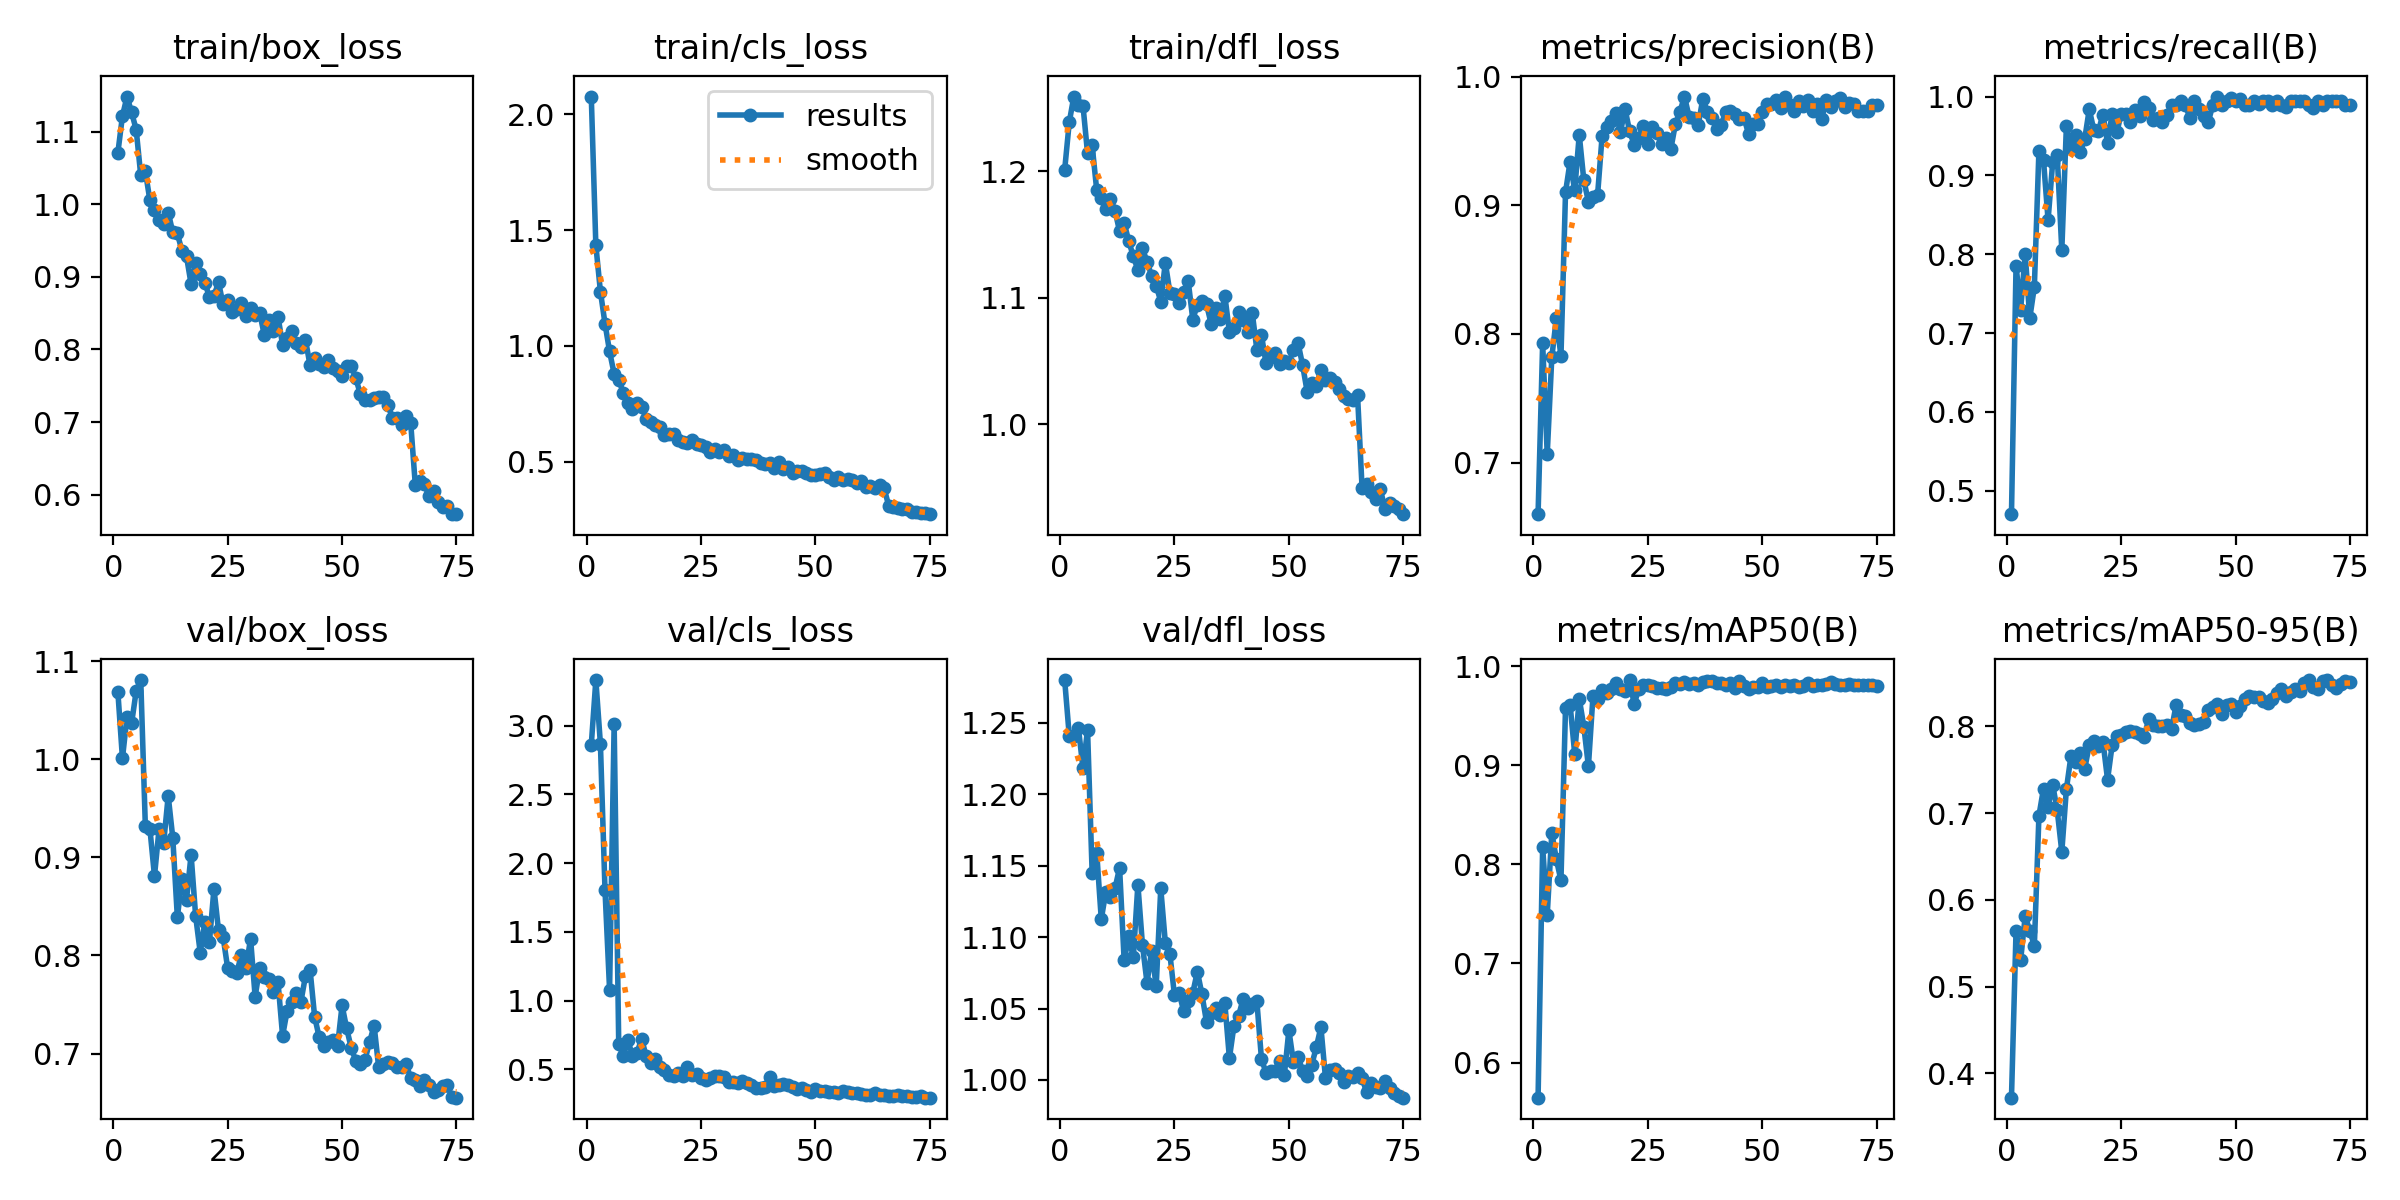

In [9]:
Image(filename='runs/detect/train/results.png', width=600)

In [10]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source={dataset.location}/test/images save_txt=True

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,556,923 parameters, 0 gradients, 6.3 GFLOPs

image 1/189 /content/Polyp-Detection-1/test/images/AM-REPITED__020_jpg.rf.31e59b2919f025b224fc94e1d27b2e6f.jpg: 640x640 1 polyps, 29.7ms
image 2/189 /content/Polyp-Detection-1/test/images/AM-REPITED__022_jpg.rf.4aadaee775975b479cea4fd05c490d9c.jpg: 640x640 1 polyps, 22.9ms
image 3/189 /content/Polyp-Detection-1/test/images/AM-REPITED__027_jpg.rf.075e1f2bc923e1428828c08f8cbc3f9c.jpg: 640x640 1 polyps, 26.4ms
image 4/189 /content/Polyp-Detection-1/test/images/AM-REPITED__029_jpg.rf.1f0cad1c2b8a67fdedd081840f08c895.jpg: 640x640 1 polyps, 22.7ms
image 5/189 /content/Polyp-Detection-1/test/images/AN__030_jpg.rf.151295e1cd5d94b6ac9a7ad8febe1e44.jpg: 640x640 1 polyps, 26.2ms
image 6/189 /content/Polyp-Detection-1/test/images/AN__032_jpg.rf.647ce5cea735f35ba9592043b0b53677.jpg: 640x640 1 polyps, 19.9ms
image 7/189 /content/Polyp

In [11]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source={dataset.location}/test/images save=True

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,556,923 parameters, 0 gradients, 6.3 GFLOPs

image 1/189 /content/Polyp-Detection-1/test/images/AM-REPITED__020_jpg.rf.31e59b2919f025b224fc94e1d27b2e6f.jpg: 640x640 1 polyps, 30.3ms
image 2/189 /content/Polyp-Detection-1/test/images/AM-REPITED__022_jpg.rf.4aadaee775975b479cea4fd05c490d9c.jpg: 640x640 1 polyps, 20.2ms
image 3/189 /content/Polyp-Detection-1/test/images/AM-REPITED__027_jpg.rf.075e1f2bc923e1428828c08f8cbc3f9c.jpg: 640x640 1 polyps, 20.0ms
image 4/189 /content/Polyp-Detection-1/test/images/AM-REPITED__029_jpg.rf.1f0cad1c2b8a67fdedd081840f08c895.jpg: 640x640 1 polyps, 19.0ms
image 5/189 /content/Polyp-Detection-1/test/images/AN__030_jpg.rf.151295e1cd5d94b6ac9a7ad8febe1e44.jpg: 640x640 1 polyps, 19.2ms
image 6/189 /content/Polyp-Detection-1/test/images/AN__032_jpg.rf.647ce5cea735f35ba9592043b0b53677.jpg: 640x640 1 polyps, 21.5ms
image 7/189 /content/Polyp


image 1/1 /content/Polyp-Detection-1/test/images/ps__030_jpg.rf.d295f365d102eb7a037234f4cff74bd2.jpg: 640x640 1 polyps, 16.9ms
Speed: 3.2ms preprocess, 16.9ms inference, 197.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


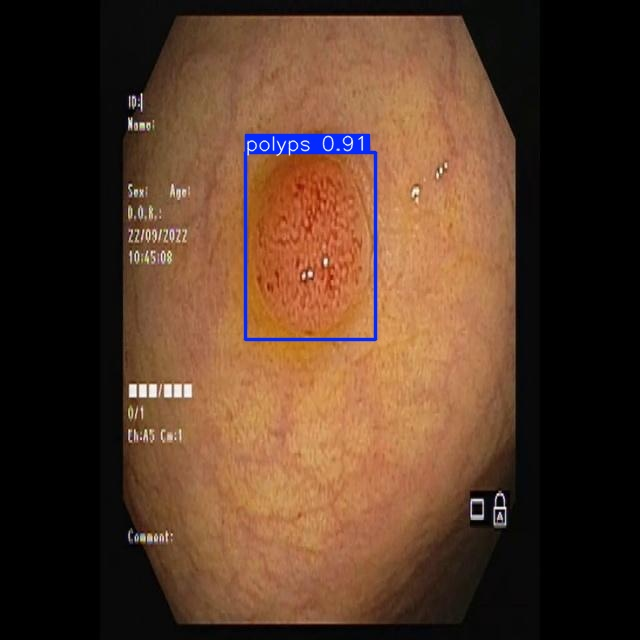

Predicted: ps__030_jpg.rf.d295f365d102eb7a037234f4cff74bd2.jpg


image 1/1 /content/Polyp-Detection-1/test/images/data_SS_1__051_jpg.rf.acbb4614d1548e76c25caeb194c0ce6f.jpg: 640x640 1 polyps, 16.8ms
Speed: 3.0ms preprocess, 16.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


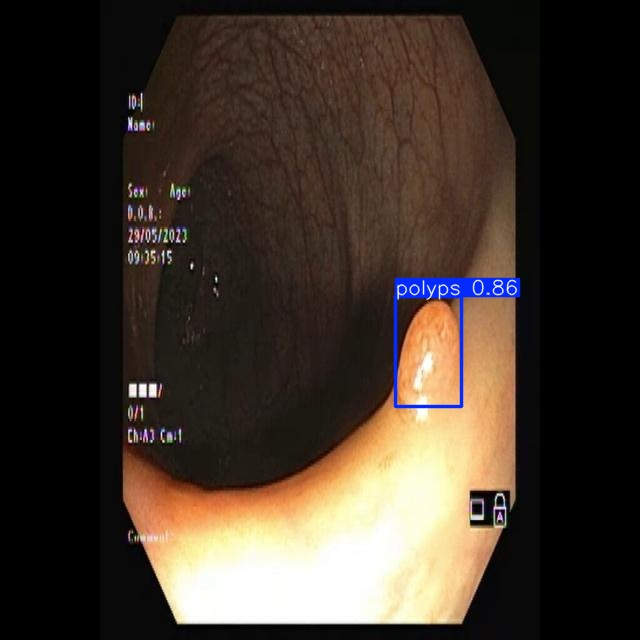

Predicted: data_SS_1__051_jpg.rf.acbb4614d1548e76c25caeb194c0ce6f.jpg


image 1/1 /content/Polyp-Detection-1/test/images/data_AKB__008_jpg.rf.487f4c8de25c70df3563308120ad22b3.jpg: 640x640 1 polyps, 19.1ms
Speed: 2.4ms preprocess, 19.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


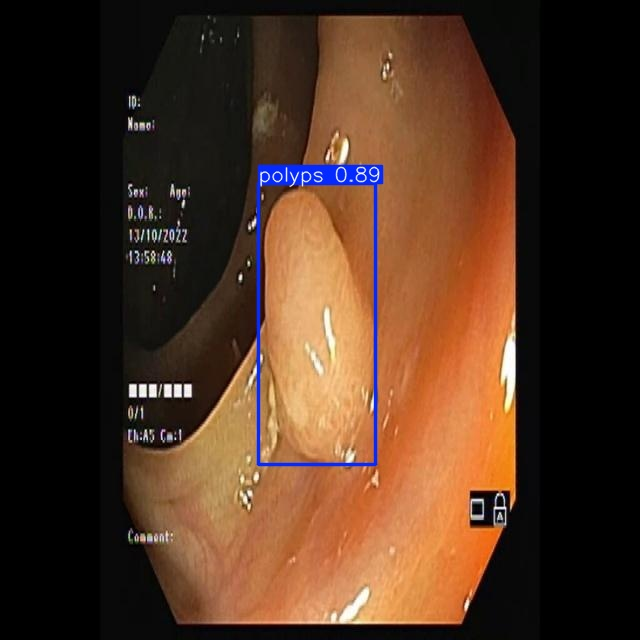

Predicted: data_AKB__008_jpg.rf.487f4c8de25c70df3563308120ad22b3.jpg


image 1/1 /content/Polyp-Detection-1/test/images/data_AM_1tiff__021_jpg.rf.a377f928b4015e2582b1a692c2dcb59d.jpg: 640x640 1 polyps, 21.2ms
Speed: 4.5ms preprocess, 21.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


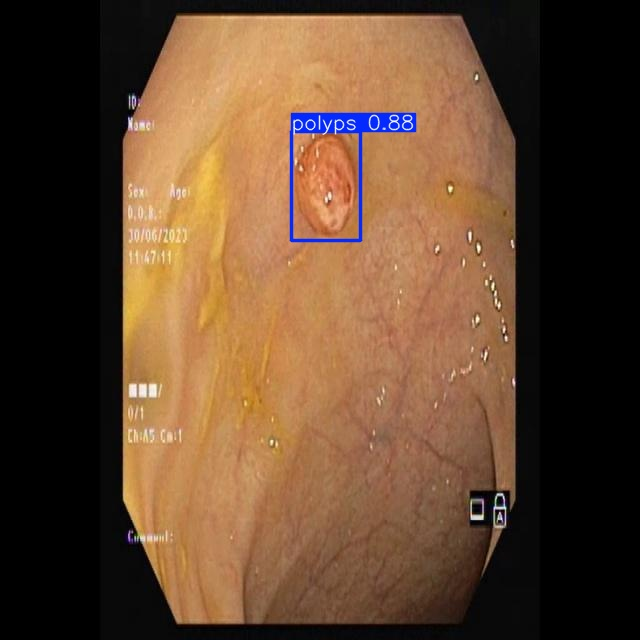

Predicted: data_AM_1tiff__021_jpg.rf.a377f928b4015e2582b1a692c2dcb59d.jpg


image 1/1 /content/Polyp-Detection-1/test/images/SPD__015_jpg.rf.c6f7d9848e204a22018eecb97bdac983.jpg: 640x640 1 polyps, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


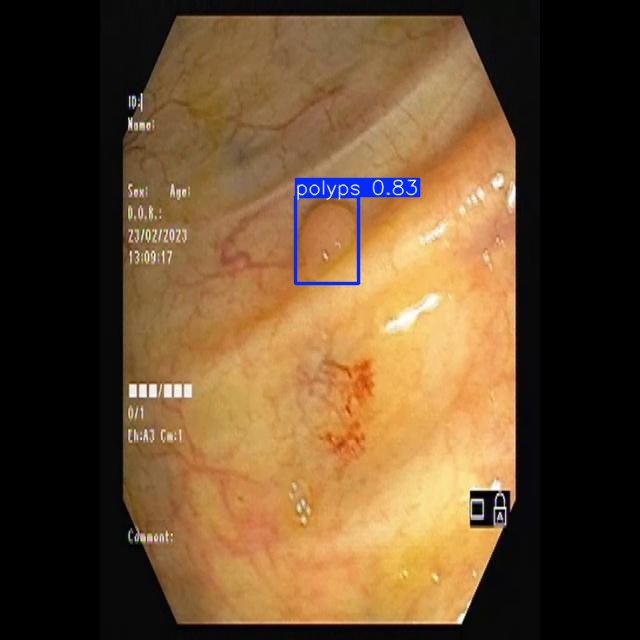

Predicted: SPD__015_jpg.rf.c6f7d9848e204a22018eecb97bdac983.jpg


image 1/1 /content/Polyp-Detection-1/test/images/data_SKD__047_jpg.rf.e9abdb2dc91d5c74b3fd4a2a152cdec3.jpg: 640x640 1 polyps, 23.0ms
Speed: 2.9ms preprocess, 23.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


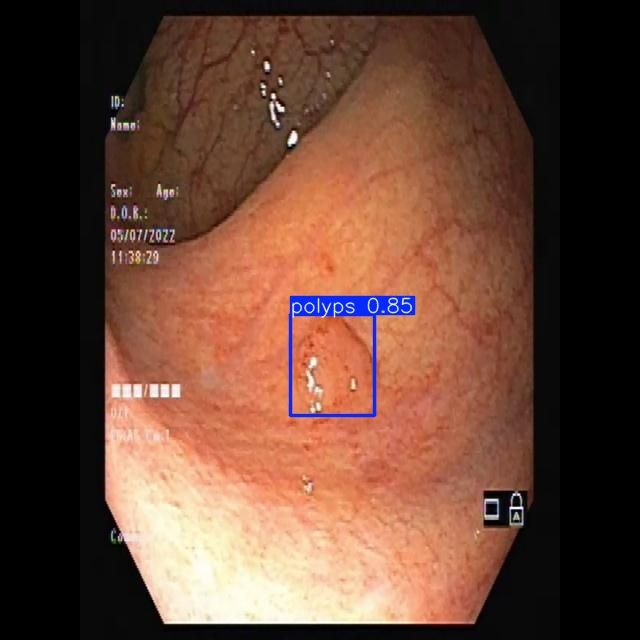

Predicted: data_SKD__047_jpg.rf.e9abdb2dc91d5c74b3fd4a2a152cdec3.jpg


image 1/1 /content/Polyp-Detection-1/test/images/data_KPM__012_jpg.rf.8918a4684f27da1ca371f0a9f45898c9.jpg: 640x640 1 polyps, 21.8ms
Speed: 2.2ms preprocess, 21.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


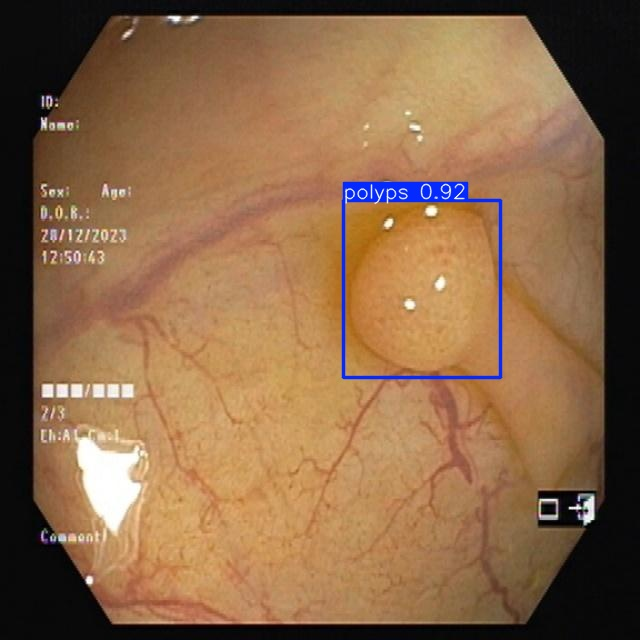

Predicted: data_KPM__012_jpg.rf.8918a4684f27da1ca371f0a9f45898c9.jpg


image 1/1 /content/Polyp-Detection-1/test/images/cs__020_jpg.rf.90372e4dde4cf627b48576b85f7dfc0b.jpg: 640x640 1 polyps, 21.0ms
Speed: 2.7ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


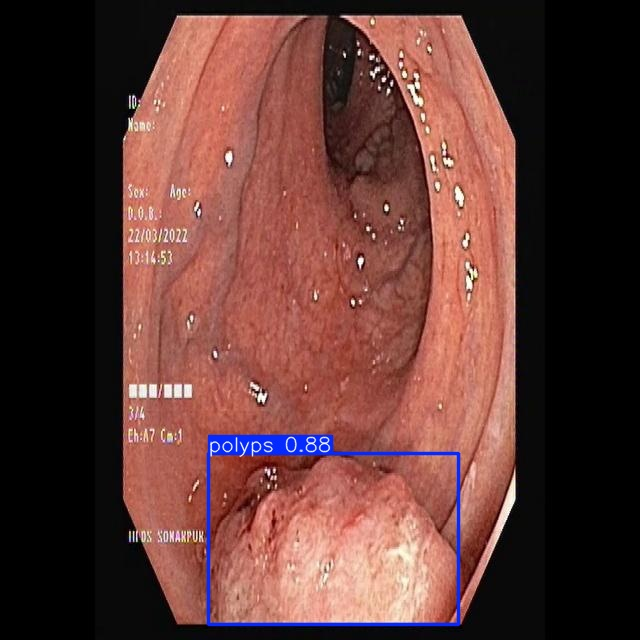

Predicted: cs__020_jpg.rf.90372e4dde4cf627b48576b85f7dfc0b.jpg


image 1/1 /content/Polyp-Detection-1/test/images/ma__052_jpg.rf.866fc32a09768613be4f1d1d9bf7e59b.jpg: 640x640 1 polyps, 20.8ms
Speed: 2.3ms preprocess, 20.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


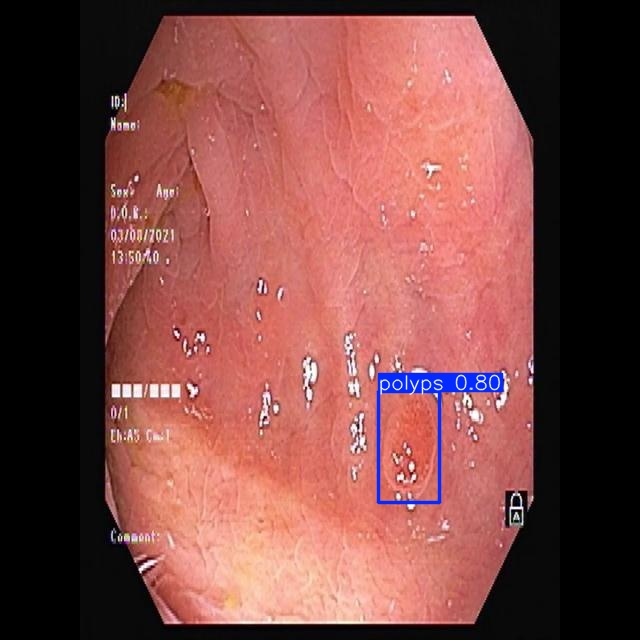

Predicted: ma__052_jpg.rf.866fc32a09768613be4f1d1d9bf7e59b.jpg


image 1/1 /content/Polyp-Detection-1/test/images/mr__015_jpg.rf.b05768afb4bf776dcefa6706c562808a.jpg: 640x640 1 polyps, 21.0ms
Speed: 2.3ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


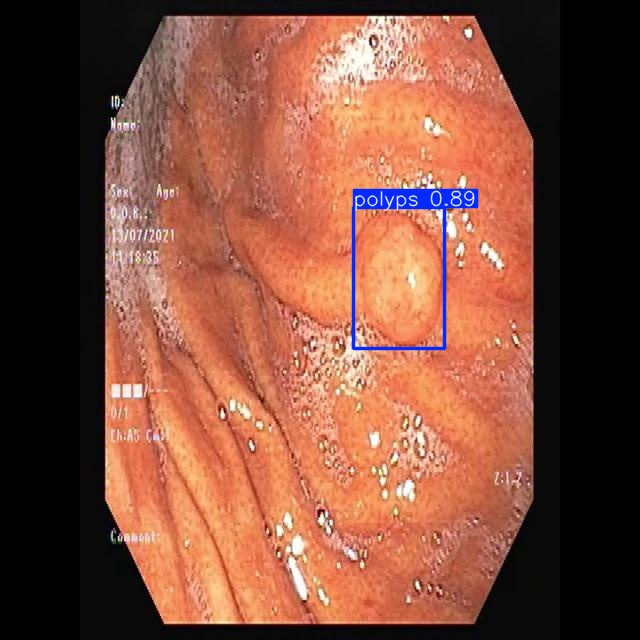

Predicted: mr__015_jpg.rf.b05768afb4bf776dcefa6706c562808a.jpg



In [12]:
import random
import glob
from IPython.display import Image, display
from ultralytics import YOLO
import os

# Load trained model
model = YOLO("runs/detect/train/weights/best.pt")

# Path to test images
test_images_dir = "/content/Polyp-Detection-1/test/images"
all_images = glob.glob(os.path.join(test_images_dir, "*.jpg"))

# Select 10 random images
random_images = random.sample(all_images, min(10, len(all_images)))

# Run prediction and display each result
for image_path in random_images:
    # Run prediction
    results = model.predict(source=image_path, save=True, save_txt=False)

    # Find output path
    pred_dir = os.path.join("runs", "detect", "predict")  # default output path
    pred_image_path = os.path.join(pred_dir, os.path.basename(image_path))

    # Display image
    display(Image(filename=pred_image_path, width=600))
    print(f"Predicted: {os.path.basename(image_path)}\n")


In [13]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,556,923 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1302.9±429.8 MB/s, size: 35.0 KB)
val: Scanning /content/Polyp-Detection-1/valid/labels.cache... 188 images, 3 backgrounds, 0 corrupt: 100% 188/188 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:03<00:00,  3.94it/s]
                   all        188        185      0.981      0.989      0.982      0.852
Speed: 1.5ms preprocess, 6.2ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val
